# Auswertung Validierung mit Clusterbeispielen
- Hoher Anteil an problematischen Beispielen!
- ICP to point src=tem scheint beste ICP-Variante zu sein 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [4]:
filename = "clusterbeispielvalidierung.csv"

filename = os.path.join("validierung", filename)
df = pd.read_csv(filename, index_col=False)
df["direction"].fillna("none", inplace=True)
df["how_dir"] = df["how"]  + " " + df["direction"]
df["template str"] = df["template"].astype(str)
df["rmse_all"] = df["rmse_all"].replace(0, np.nan)
df.head()

,file,template,cluster_id,how,direction,shift_z,total,inliers,inlier_ratio,rmse_inliers,...,corr_yz,max_corr,icp_rmse,icp_fitness,side_a,side_b,not_same_side,time,how_dir,template str
0,PunkteSeiteVieleAusreisser,NaN,0,My,none,0.0,475,457.0,0.962105,0.003957,...,8.796964e-17,0.157073,NaN,NaN,-0.823834,-0.683616,0.0,0.000541,My none,nan
1,PunkteSeiteVieleAusreisser,0.0,0,ICP to_point,src=tem,0.0,478,450.0,0.941423,0.005582,...,4.817416e-02,0.091148,0.013179,0.498224,NaN,NaN,NaN,0.270257,ICP to_point src=tem,0.0
2,PunkteSeiteVieleAusreisser,0.0,0,ICP to_plane,src=tem,0.0,475,458.0,0.964211,0.005308,...,7.201391e-02,0.191585,0.012965,0.475461,NaN,NaN,NaN,0.364299,ICP to_plane src=tem,0.0
3,PunkteSeiteVieleAusreisser,0.0,0,ICP to_point,src=pcl,0.0,483,468.0,0.968944,0.003661,...,8.647231e-02,0.155914,0.005090,0.530761,NaN,NaN,NaN,0.088950,ICP to_point src=pcl,0.0
4,PunkteSeiteVieleAusreisser,0.0,0,ICP to_plane,src=pcl,0.0,476,461.0,0.968487,0.003650,...,7.986600e-02,0.157161,0.005186,0.528676,NaN,NaN,NaN,0.024852,ICP to_plane src=pcl,0.0


In [5]:
df.columns

Index(['file', 'template', 'cluster_id', 'how', 'direction', 'shift_z',
       'total', 'inliers', 'inlier_ratio', 'rmse_inliers', 'rmse_all',
       'max_z_diff', 'corr_xy', 'corr_xy_upper', 'corr_yz', 'max_corr',
       'icp_rmse', 'icp_fitness', 'side_a', 'side_b', 'not_same_side', 'time',
       'how_dir', 'template str'],
      dtype='object')

In [6]:
df["file"].unique()

array(['PunkteSeiteVieleAusreisser', 'ObenundSeite', 'ObenNull1',
       'PunkteSeite', 'VieleLückeMitte', 'VieleGleiseEherTop',
       'VieleSchürhaken', 'VieleZ', 'Achszaehler1', 'Achszaehler2',
       'Achszaehler3', 'Auch links rechts falsch', 'PunkteOben',
       'ObenNull', 'ObenNull2', 'ObenNull3', 'Abseits1',
       'Abseits14Punkte', 'AbseitsAusreisser', 'VSeite1', 'VSeite2',
       'VSeite3', 'VSeite4', 'VSeite5'], dtype=object)

In [7]:
df["filetype"] = df["file"]
df["filetype"] = df["filetype"].replace(regex="\d",  value="")
df["filetype"] = df["filetype"].replace("PunkteSeiteVieleAusreisser", "Seite")
df["filetype"] = df["filetype"].replace("ObenundSeite", "Oben")
df["filetype"] = df["filetype"].replace("ObenNull", "Oben")
df["filetype"] = df["filetype"].replace("PunkteOben", "Oben")
df["filetype"] = df["filetype"].replace("VieleGleiseEherTop", "Oben")
df["filetype"] = df["filetype"].replace("VieleSchürhaken", "Seite")
df["filetype"] = df["filetype"].replace("Auch links rechts falsch", "Seite")
df["filetype"] = df["filetype"].replace("PunkteSeite", "Seite")
df["filetype"] = df["filetype"].replace("VieleLückeMitte", "Abseits")
df["filetype"] = df["filetype"].replace("VieleZ", "Abseits")
df["filetype"] = df["filetype"].replace("VSeite", "Seite")
df["filetype"] = df["filetype"].replace(regex="Abseits.*", value="Abseits")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           600 non-null    object 
 1   template       576 non-null    float64
 2   cluster_id     600 non-null    int64  
 3   how            600 non-null    object 
 4   direction      600 non-null    object 
 5   shift_z        600 non-null    float64
 6   total          600 non-null    int64  
 7   inliers        600 non-null    float64
 8   inlier_ratio   600 non-null    float64
 9   rmse_inliers   596 non-null    float64
 10  rmse_all       520 non-null    float64
 11  max_z_diff     600 non-null    float64
 12  corr_xy        600 non-null    float64
 13  corr_xy_upper  600 non-null    float64
 14  corr_yz        600 non-null    float64
 15  max_corr       600 non-null    float64
 16  icp_rmse       576 non-null    float64
 17  icp_fitness    576 non-null    float64
 18  side_a    

## Totalversagen bei ICP
- bei "src=pcl" (im ipynb Version "Vertauscht") extrem häufig Totalversagen (0 Inlier)
- insbes. bei Punkten nur auf Seite, aber auch in allen anderen Fällen
- sowohl bei shift_z 0 als auch 0.03

In [9]:
df[df["inliers"] == 0].groupby("how_dir").count()["file"] # Use any column to count

how_dir
ICP to_plane src=pcl    54
ICP to_plane src=tem     6
ICP to_point src=pcl    24
Name: file, dtype: int64

In Prozent

In [10]:
(df[df["inliers"] == 0].groupby("how_dir").count()["file"]  * 100 / df.groupby("how_dir").count()["file"]).dropna() 

how_dir
ICP to_plane src=pcl    37.500000
ICP to_plane src=tem     4.166667
ICP to_point src=pcl    16.666667
Name: file, dtype: float64

In [11]:
# df[df["inliers"] == 0].groupby(["how_dir", "filetype", "shift_z"]).count()["file"] 
df[df["inliers"] == 0].groupby(["how_dir", "filetype"]).count()["file"] 

how_dir               filetype   
ICP to_plane src=pcl  Abseits        28
                      Achszaehler     4
                      Oben           15
                      Seite           7
ICP to_plane src=tem  Abseits         6
ICP to_point src=pcl  Abseits        12
                      Oben            6
                      Seite           6
Name: file, dtype: int64

In [12]:
df[df["inliers"] == 0].groupby("template").count()["file"] # Use any column to count

template
0.0    27
1.0    31
2.0    26
Name: file, dtype: int64

## Fail
Eindeutig fail wenn
- kleine inlier ratio
- max z Differenz zu groß
- eindeutige Korrelation in x-y oder y-z Richtung (d.h. schräg in der Projektion)

In [13]:
df["fail"] = (df["inlier_ratio"] < 0.6) | (df["max_z_diff"] > 0.01) | (df["max_corr"] > 0.5)

In [14]:
df[df["fail"] == True].groupby("how_dir").count()["file"] 

how_dir
ICP to_plane src=pcl    66
ICP to_plane src=tem    71
ICP to_point src=pcl    79
ICP to_point src=tem    54
My none                  2
Name: file, dtype: int64

Prozent

In [15]:
df[df["fail"] == True].groupby("how_dir").count()["file"] * 100 / df.groupby("how_dir").count()["file"]

how_dir
ICP to_plane src=pcl    45.833333
ICP to_plane src=tem    49.305556
ICP to_point src=pcl    54.861111
ICP to_point src=tem    37.500000
My none                  8.333333
Name: file, dtype: float64

Nach Filetype

In [16]:
df[df["fail"] == True].groupby(["how_dir", "filetype"]).count()["file"]

how_dir               filetype   
ICP to_plane src=pcl  Abseits        30
                      Achszaehler     9
                      Oben           18
                      Seite           9
ICP to_plane src=tem  Abseits        29
                      Achszaehler    11
                      Oben            3
                      Seite          28
ICP to_point src=pcl  Abseits        28
                      Achszaehler    15
                      Oben           30
                      Seite           6
ICP to_point src=tem  Abseits        28
                      Achszaehler    16
                      Seite          10
My none               Achszaehler     2
Name: file, dtype: int64

nach template

In [17]:
df[df["fail"] == True].groupby(["template"]).count()["file"]

template
0.0    83
1.0    90
2.0    97
Name: file, dtype: int64

- My eindeutig am besten, aber Probleme mit Achszähler
- ICP hat auch bei einfachen Situationen Probleme
- Template 0 eher besser

## Basic stats
Alle Punkte

In [61]:
stats = ["median", "mean", "std", "min", "max"]
df.groupby("how_dir").aggregate({"rmse_all": stats, "inlier_ratio": stats, "max_z_diff": stats, "max_corr": stats}).dropna()

rmse_all                                          \
                        median      mean       std       min       max   
how_dir                                                                  
ICP to_plane src=pcl  0.004549  0.011057  0.033415  0.003582  0.319319   
ICP to_plane src=tem  0.012132  0.022652  0.056399  0.003806  0.533156   
ICP to_point src=pcl  0.011472  0.013003  0.011350  0.003648  0.056310   
ICP to_point src=tem  0.006375  0.010805  0.006921  0.004279  0.027383   
My none               0.005131  0.008303  0.005305  0.004061  0.022386   

                     inlier_ratio                                          \
                           median      mean       std       min       max   
how_dir                                                                     
ICP to_plane src=pcl     0.771318  0.552488  0.450191  0.000000  1.000000   
ICP to_plane src=tem     0.806716  0.693239  0.304510  0.000000  1.000000   
ICP to_point src=pcl     0.659152  0.636159  0.347505  0.000000  1.000000   
ICP to_point src=tem     0.898537  0.794870  0.208326  0.349099  0.997429   
My none                  0.945485  0.874690  0.140828  0.427273  0.994832   

                     max_z_diff                                          \
                         median      mean       std       min       max   
how_dir                                                                   
ICP to_plane src=pcl   0.004980  0.008704  0.047060  0.000000  0.564700   
ICP to_plane src=tem   0.006351  0.027264  0.074983  0.000000  0.709697   
ICP to_point src=pcl   0.005429  0.009951  0.013544  0.000000  0.062338   
ICP to_point src=tem   0.004318  0.011490  0.014854  0.000093  0.051382   
My none                0.002260  0.002885  0.002052  0.000353  0.007352   

                      max_corr                                          
                        median      mean       std       min       max  
how_dir                                                                 
ICP to_plane src=pcl  0.174091  0.424745  0.389901  0.034903  0.998101  
ICP to_plane src=tem  0.244695  0.336258  0.263188  0.027813  0.997127  
ICP to_point src=pcl  0.505454  0.544391  0.404886  0.017969  0.998101  
ICP to_point src=tem  0.120016  0.254796  0.267821  0.008923  0.964282  
My none               0.096761  0.185932  0.195608  0.010504  0.764932

Nur nicht-fail

In [60]:
df[df["fail"]==False].groupby("how_dir").aggregate({"rmse_all": ["median", "mean", "std", "min", "max"], "inlier_ratio": ["median", "mean", "std", "min", "max"], "max_z_diff": ["median", "mean", "std", "min", "max"], "max_corr": ["median", "mean", "std", "min", "max"]}).dropna()

rmse_all                                          \
                        median      mean       std       min       max   
how_dir                                                                  
ICP to_plane src=pcl  0.004430  0.006325  0.003753  0.003582  0.018278   
ICP to_plane src=tem  0.005153  0.006389  0.003889  0.003806  0.020424   
ICP to_point src=pcl  0.004379  0.006304  0.004405  0.003648  0.023419   
ICP to_point src=tem  0.005719  0.006236  0.002503  0.004279  0.019337   
My none               0.004930  0.007676  0.005068  0.004061  0.022386   

                     inlier_ratio                                          \
                           median      mean       std       min       max   
how_dir                                                                     
ICP to_plane src=pcl     0.968487  0.930157  0.086465  0.655670  1.000000   
ICP to_plane src=tem     0.966942  0.937581  0.085851  0.616452  1.000000   
ICP to_point src=pcl     0.966874  0.934106  0.081287  0.644509  1.000000   
ICP to_point src=tem     0.952768  0.938407  0.058134  0.648571  0.997429   
My none                  0.949040  0.905280  0.093732  0.633238  0.994832   

                     max_z_diff                                          \
                         median      mean       std       min       max   
how_dir                                                                   
ICP to_plane src=pcl   0.006270  0.006232  0.002032  0.001189  0.009546   
ICP to_plane src=tem   0.005096  0.004905  0.002371  0.000091  0.009475   
ICP to_point src=pcl   0.005008  0.005168  0.001773  0.001952  0.008732   
ICP to_point src=tem   0.003253  0.003325  0.001801  0.000373  0.007384   
My none                0.002260  0.003013  0.002070  0.000470  0.007352   

                      max_corr                                          
                        median      mean       std       min       max  
how_dir                                                                 
ICP to_plane src=pcl  0.093752  0.134130  0.105081  0.034903  0.497751  
ICP to_plane src=tem  0.186967  0.195246  0.109275  0.027813  0.473888  
ICP to_point src=pcl  0.114697  0.130623  0.099013  0.017969  0.480129  
ICP to_point src=tem  0.091148  0.103192  0.079834  0.008923  0.496218  
My none               0.095171  0.141440  0.127500  0.010504  0.451765

## RMSE_all und inlier_ratio
- inlier_ratio: 
    - je höher desto besser
    - In schwierigen Fällen: 0.78 ist gut; 0.6 kann bestes aber mäßig gutes Ergebnis unter allen Methoden sein
    - unter 0.5 auf jeden Fall ein Fail
- RMSE_all
    - je tiefer desto besser
    - hier hat ICP to-plain (insbes. src=tem) mit "Abseits" extreme Ausreisser

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

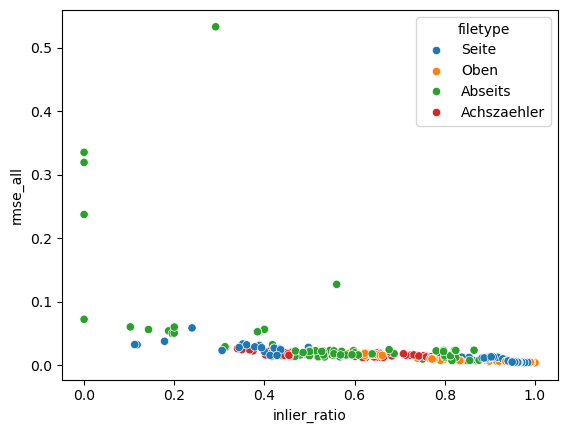

In [18]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

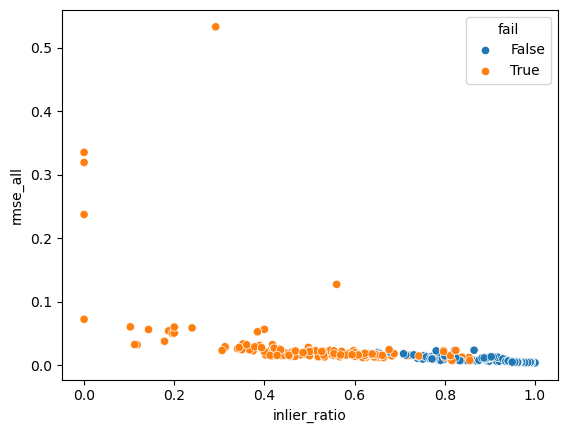

In [19]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="fail")

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

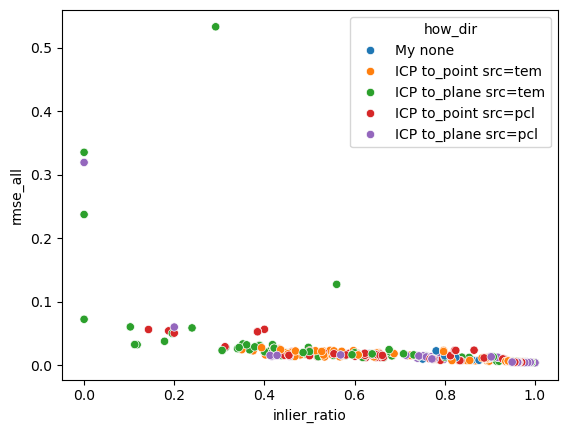

In [20]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")

Zoom in auf den Cluster links unten mit den besonders guten 
- Alle Methoden ähnlich
- ICP: src=pcl etwas besser als src=tem
- My ganz gut
- nur Oben und Seite dabei, schwierige Situationen fehlen

(0.9, 1.0)

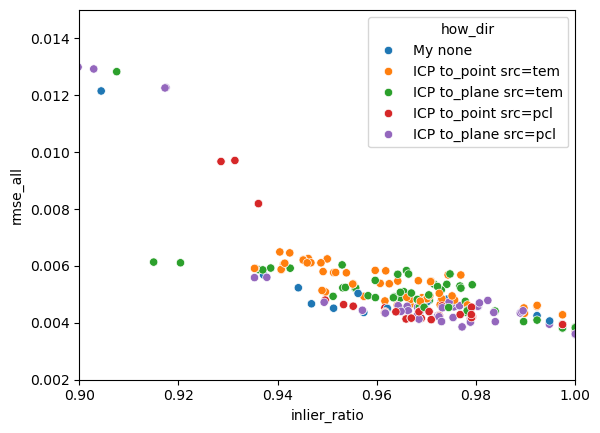

In [21]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.015)
plt.xlim(0.9, 1)

(0.9, 1.0)

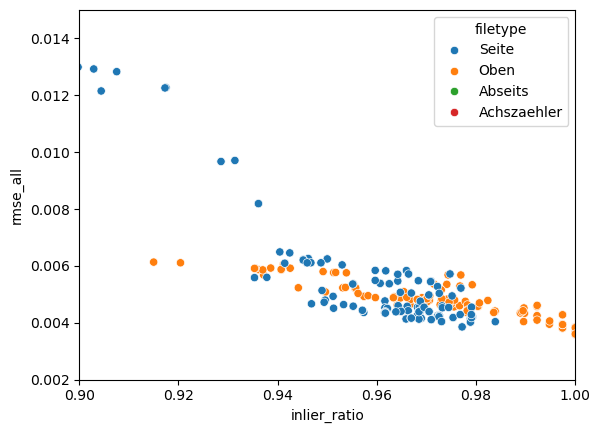

In [22]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.015)
plt.xlim(0.9, 1)

Größerer Ausschnitt
- inlier_ratio unter 0.6 kann als Fail angesehen werden, ziemlich viele davon
- My steht viel besser da als ICP

(0.3, 1.0)

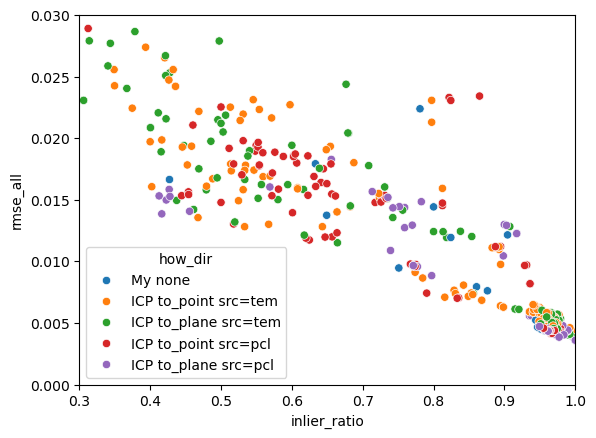

In [23]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.6)
plt.xlim(0.3, 1)

(0.3, 1.0)

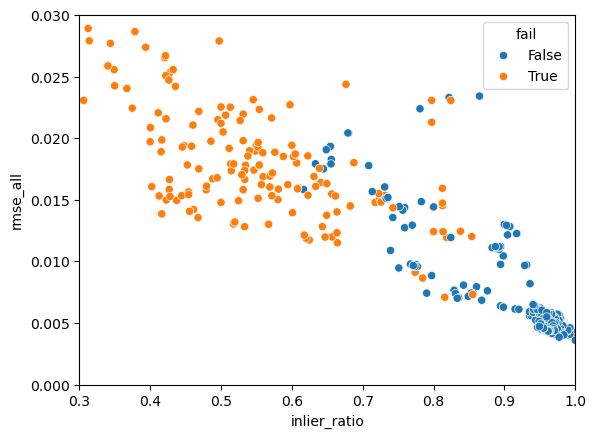

In [24]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="fail")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.6)
plt.xlim(0.3, 1)

- Seite hat generell höheren RMSE, u.a. weil viele Punkte zwischen Kopf und Steg
- Achszähler: geringe inlier ratio, erhöhtes RMSE

(0.3, 1.0)

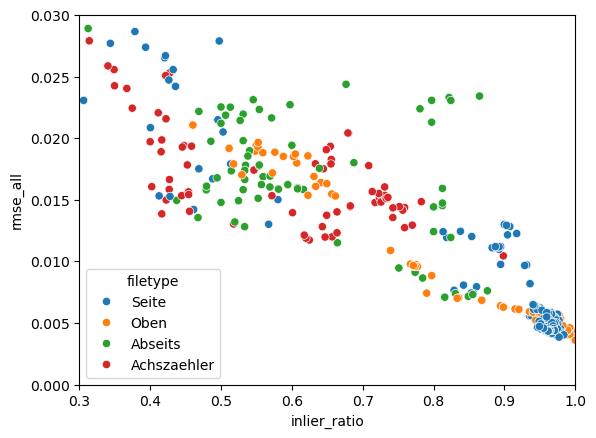

In [25]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.xlim(0.3, 1)

(0.75, 1.0)

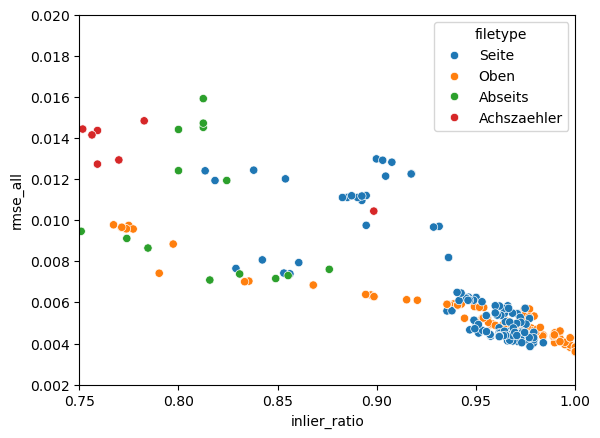

In [26]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.02)
plt.xlim(0.75, 1)

- ICP src=pcl  bei Erfolg geringster Fehler, allerdings unberechenbar

(0.75, 1.0)

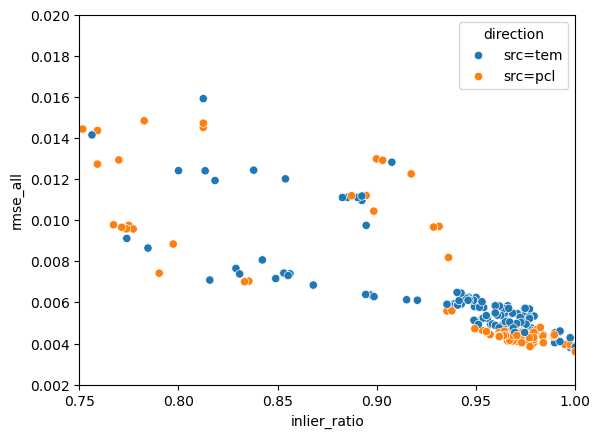

In [27]:
sns.scatterplot(data=df[df["how"]!="My"], x="inlier_ratio", y="rmse_all", hue="direction")
# sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="direction")

plt.ylim(0, 0.03)

# Optionally zoom in
plt.ylim(0.002, 0.02)
plt.xlim(0.75, 1)

(0.0, 0.03)

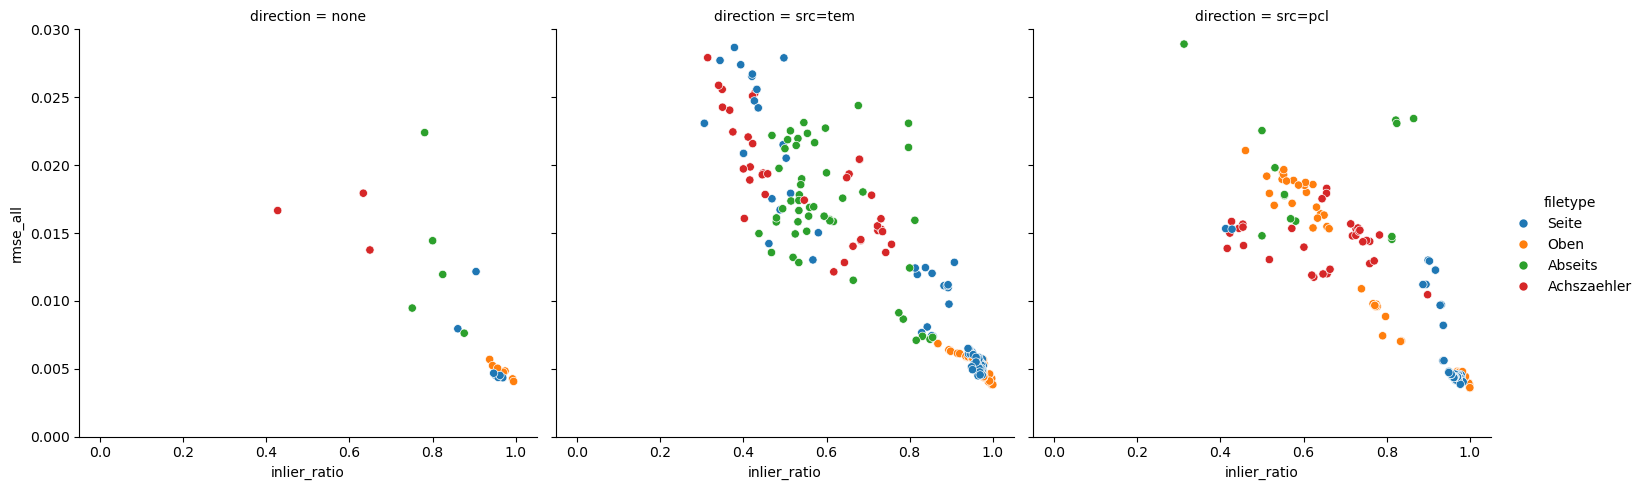

In [28]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype", col="direction")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.02)
#plt.xlim(0.2, 1)

# direction = none ist My

(0.0, 0.03)

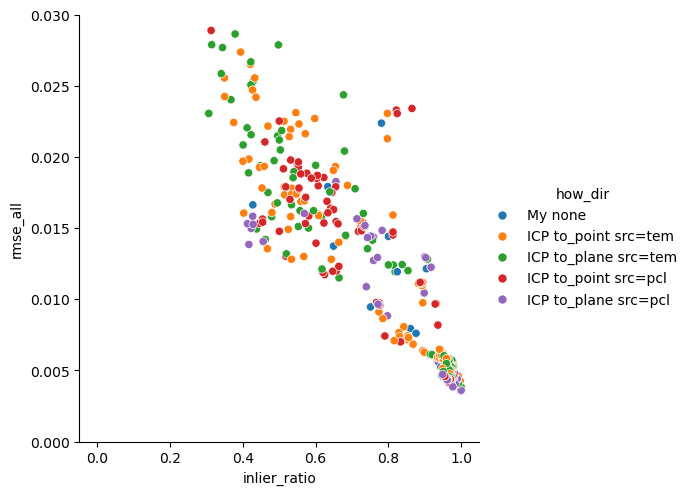

In [29]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

- My und "ICP to point src=tem" im folgenden Plot eindeutig am besten
- Template 2 generell schlecher als Template 0 und 1; 0 evtl. klein wenig besser als 1

(0.0, 1.0)

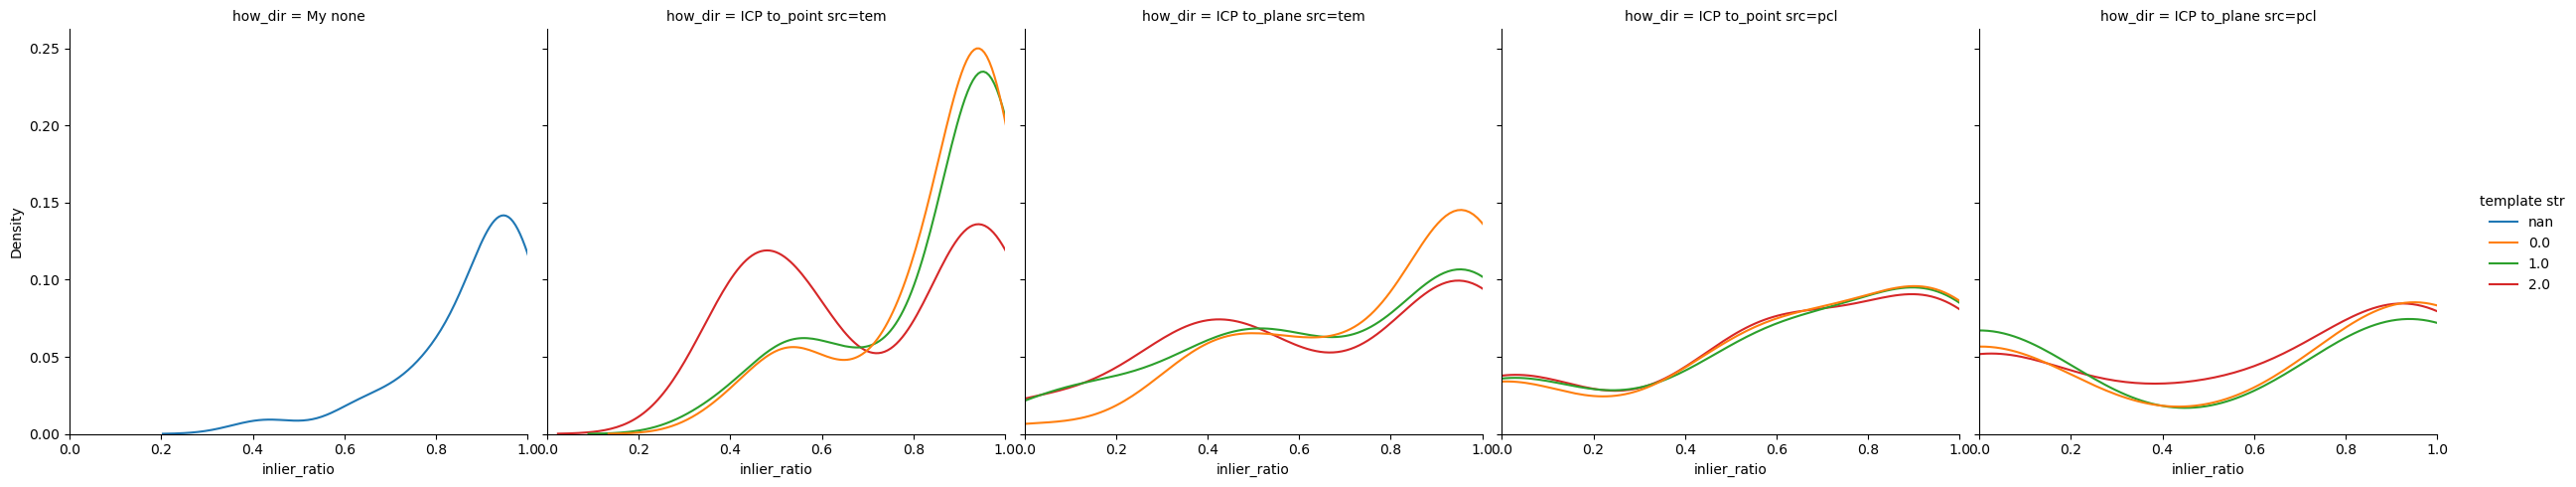

In [30]:
sns.displot(data=df, x="inlier_ratio",  col="how_dir", hue="template str", kind="kde")
plt.xlim(0, 1)

- auch hier My und "ICP to point src=tem" vorne
- "ICP to plane src=pcl" ist besonders gut, wenn es denn klappt
- Template 2 eindeutig schlecht

(0.0, 0.03)

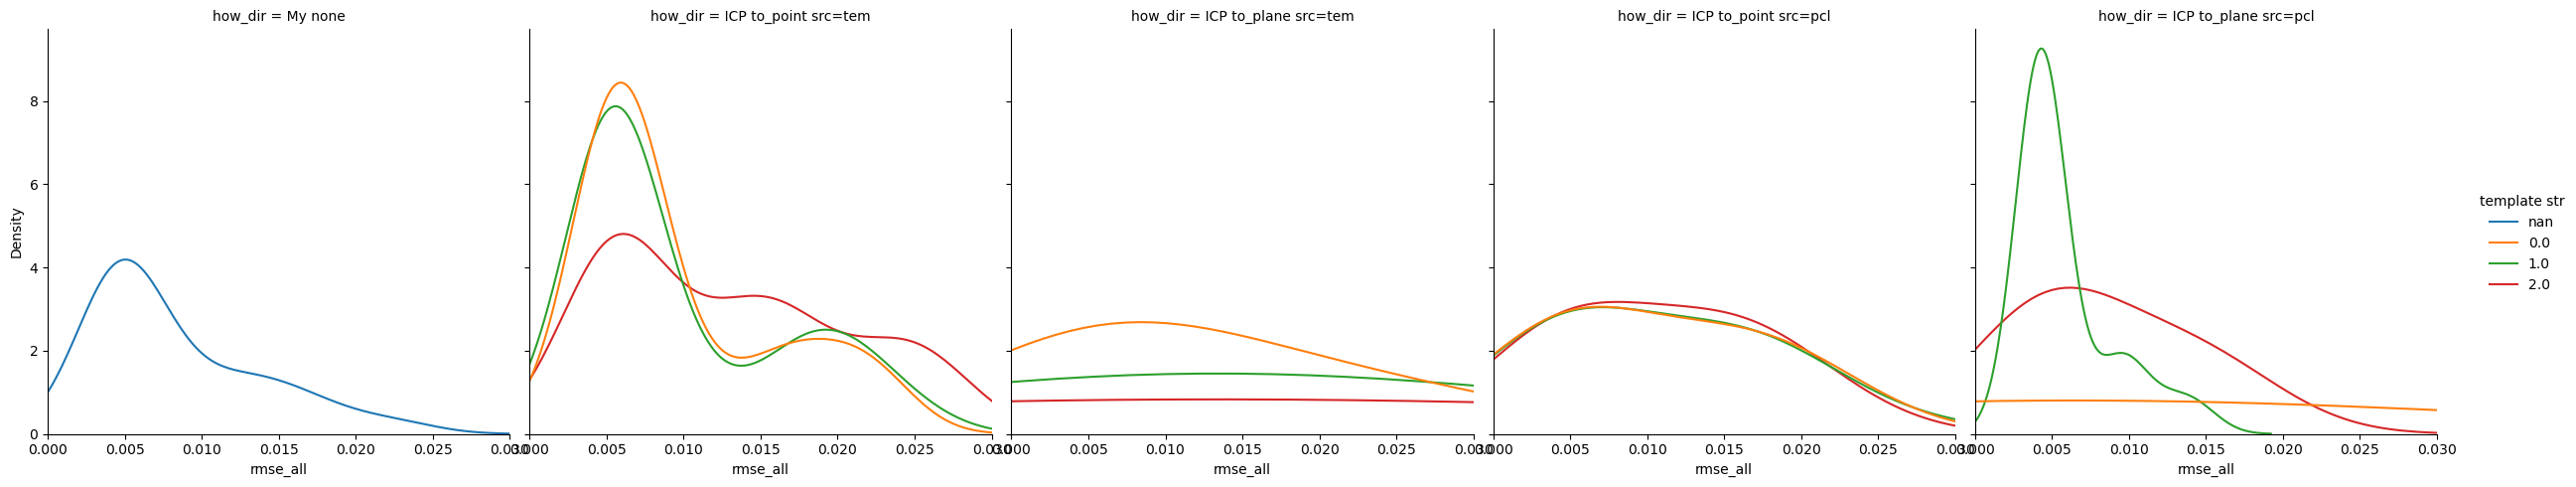

In [31]:
sns.displot(data=df, x="rmse_all",  col="how_dir", hue="template str", kind="kde")
plt.xlim(0, 0.03)

Nochmal die Templates im Vergleich

(0.0, 0.03)

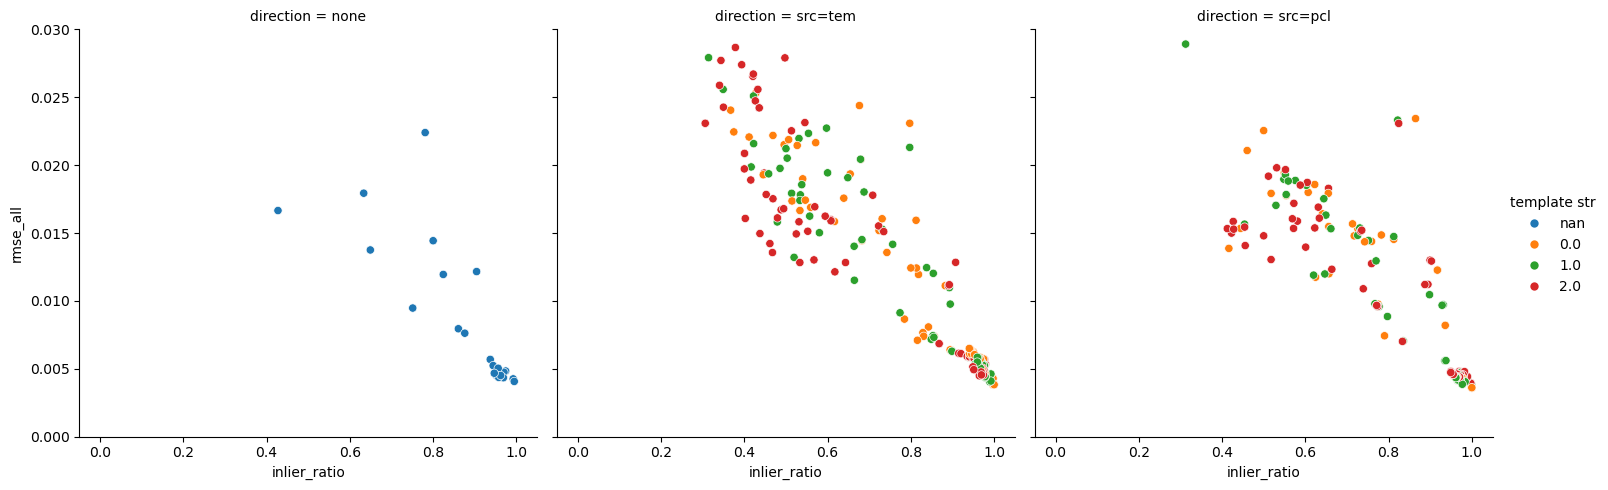

In [32]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="template str", col="direction")
plt.ylim(0, 0.03)

Bei template 0 scheint sich die Richtung am wenigsten, bei Template 2 am Meisten auszuwirken:

(0.0, 0.03)

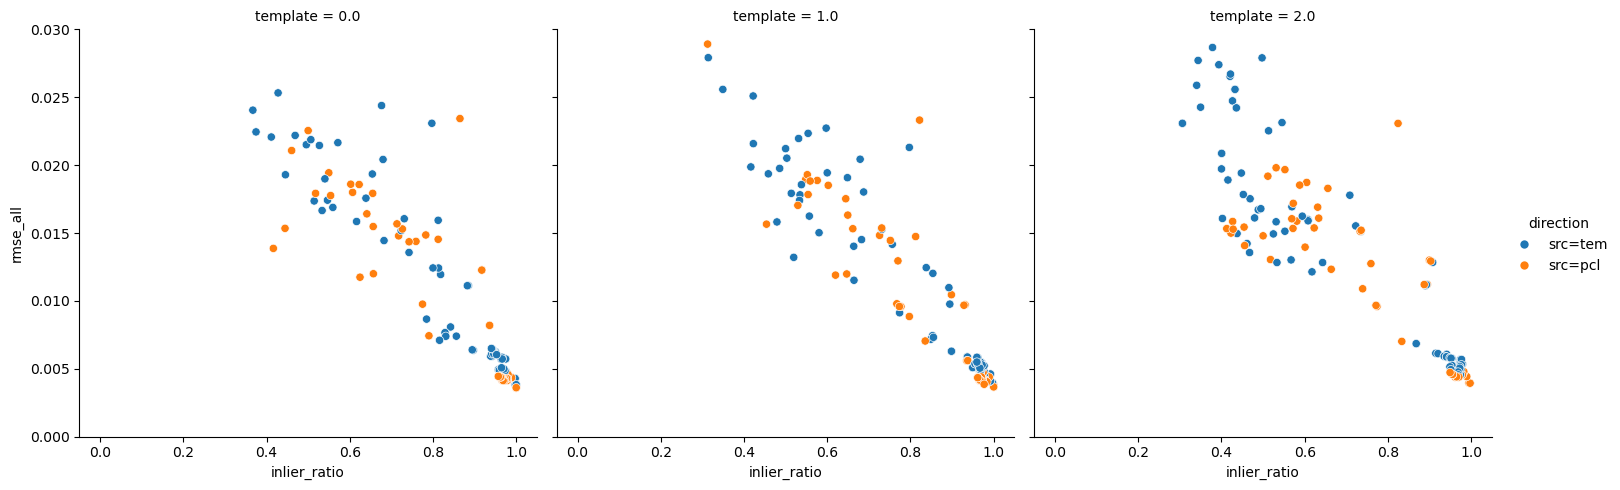

In [33]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", hue="direction", col="template")
plt.ylim(0, 0.03)


(0.0, 0.03)

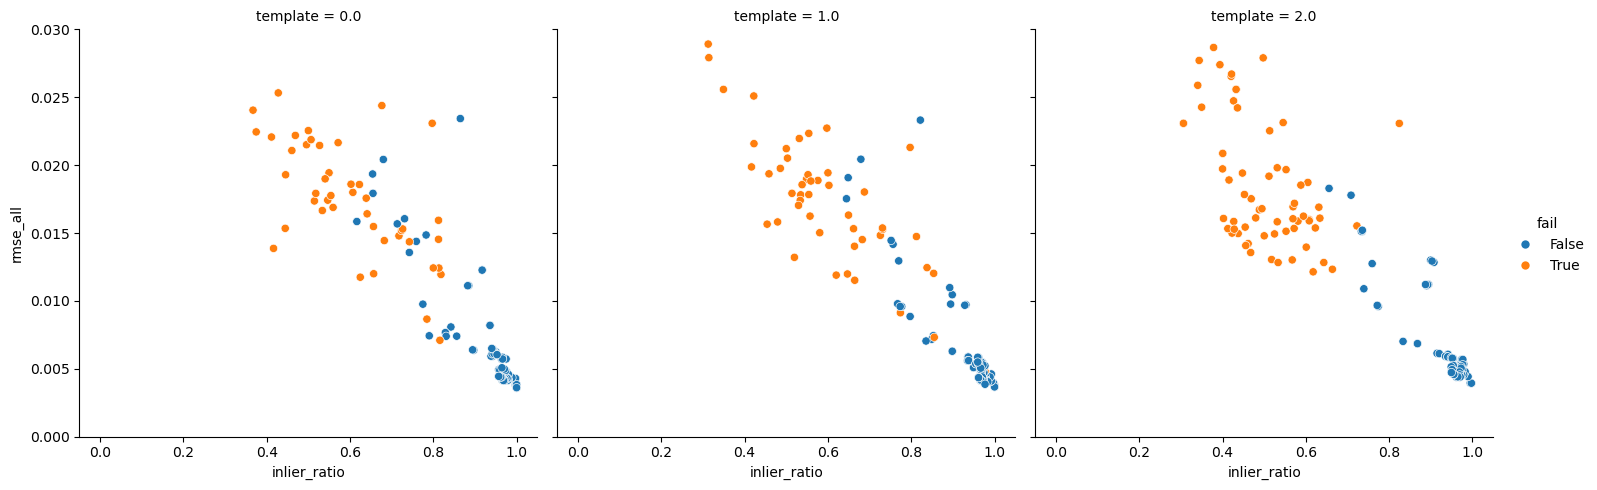

In [34]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", hue="fail", col="template")
plt.ylim(0, 0.03)

(0.0, 0.03)

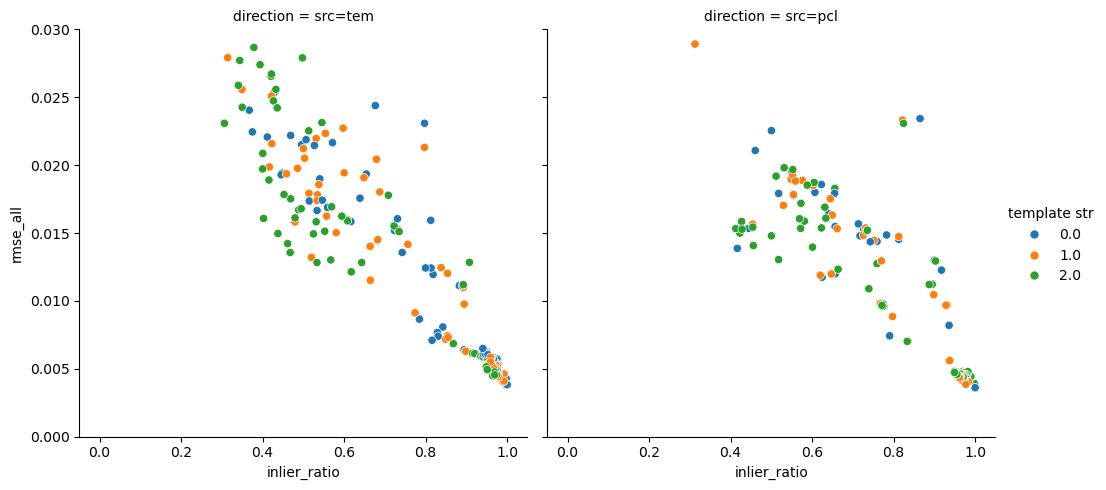

In [35]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", col="direction", hue="template str")
# sns.relplot(data=df, x="inlier_ratio", y="rmse_all", col="direction", hue="template str")

plt.ylim(0, 0.03)

(0.0, 0.03)

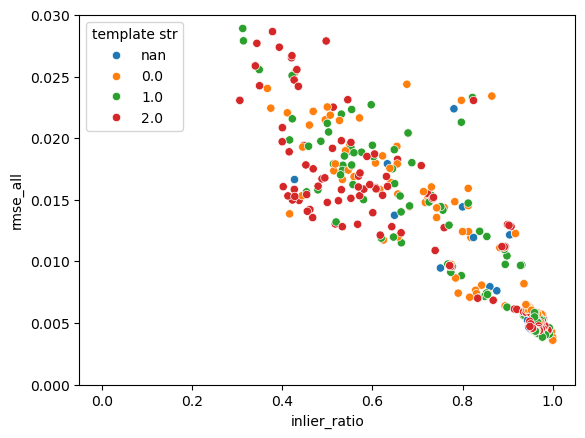

In [36]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="template str")
plt.ylim(0, 0.03)

## ICP RMSE

- ICP minimiert, was im df "ICP RMSE" ist. 
- dieser hängt stark von der anisotropen Stuktur der Scanlinien und von der Richtung (src/target) ab 
- Fitness (inlier ratio bei der ICP) hängt auch sehr stark von Richtung ab, 
- weil im einen Fall dichte Wolke gegen anisotrop sparse Wolke verglichen wird, im anderen Fall umgekehrt
- wenig aussagekräftig

(0.0, 0.03)

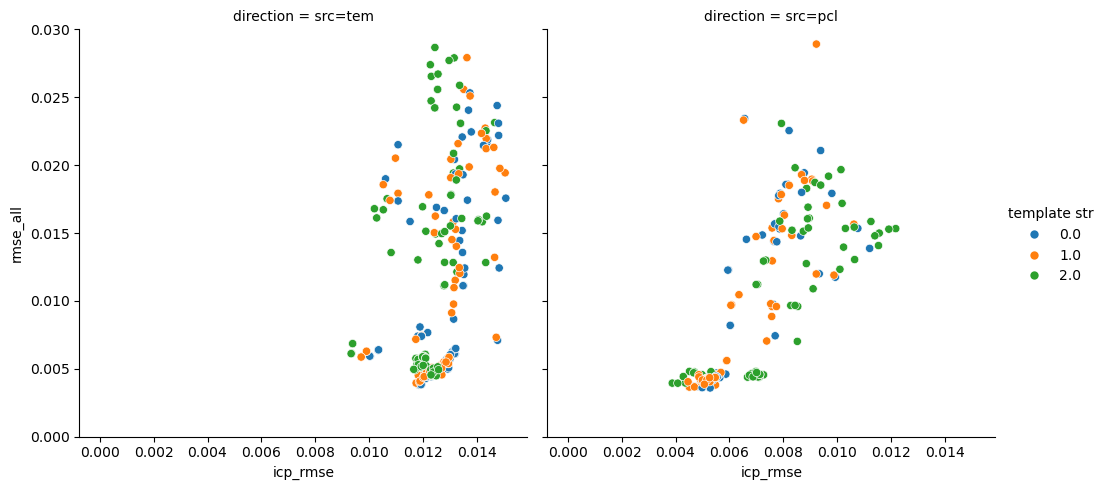

In [37]:
sns.relplot(data=df[df["how"]!= "My"], x="icp_rmse", y="rmse_all", col="direction", hue="template str")
plt.ylim(0, 0.03)

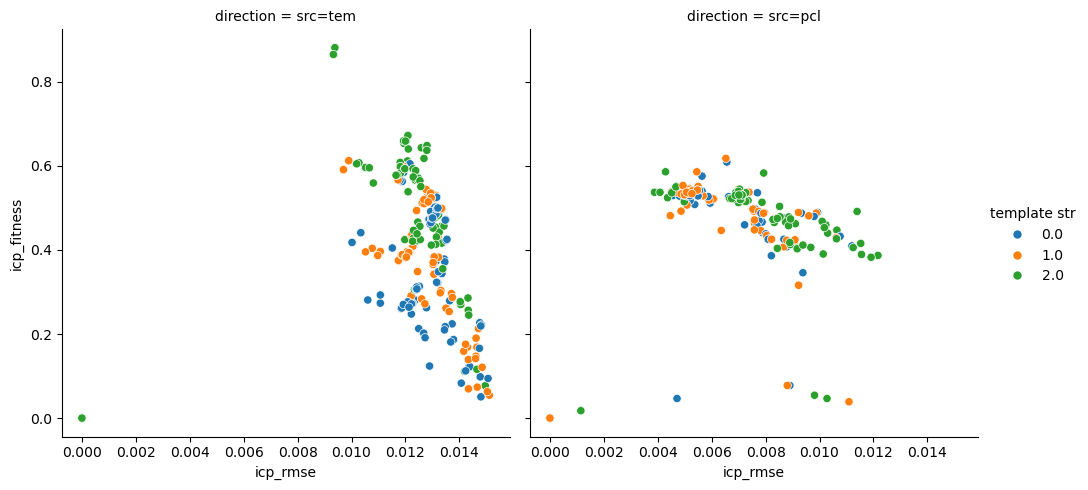

In [38]:
sns.relplot(data=df[df["how"]!= "My"], x="icp_rmse", y="icp_fitness", col="direction", hue="template str")


## Pivot RMSE
- Vergleich verschiedenere Methoden, mit jeweils gleichem Clusterpaar
- ICP: Nur Template 0

In [39]:
mask = (df["template"] == 0) | (df["template"].isna()) # Nur template 0 und Version "My"
rmse = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="rmse_all").reset_index() 
rmse.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.00,0.319319,0.021866,0.056310,0.021644,0.011940
1,Abseits1,0.03,NaN,0.012419,0.052870,0.007092,NaN
2,Abseits14Punkte,0.00,NaN,NaN,0.022533,0.022177,0.014424
3,Abseits14Punkte,0.03,NaN,0.017556,0.014527,0.015927,NaN
4,AbseitsAusreisser,0.00,NaN,0.032178,0.017750,0.021439,0.022386


In [40]:
rmse["shift_z"] = rmse["shift_z"].astype(str)

- ICP 
    - to_plane src=pcl: entweder top oder totaler fail
    - My ist tendenziell 2. Stelle 

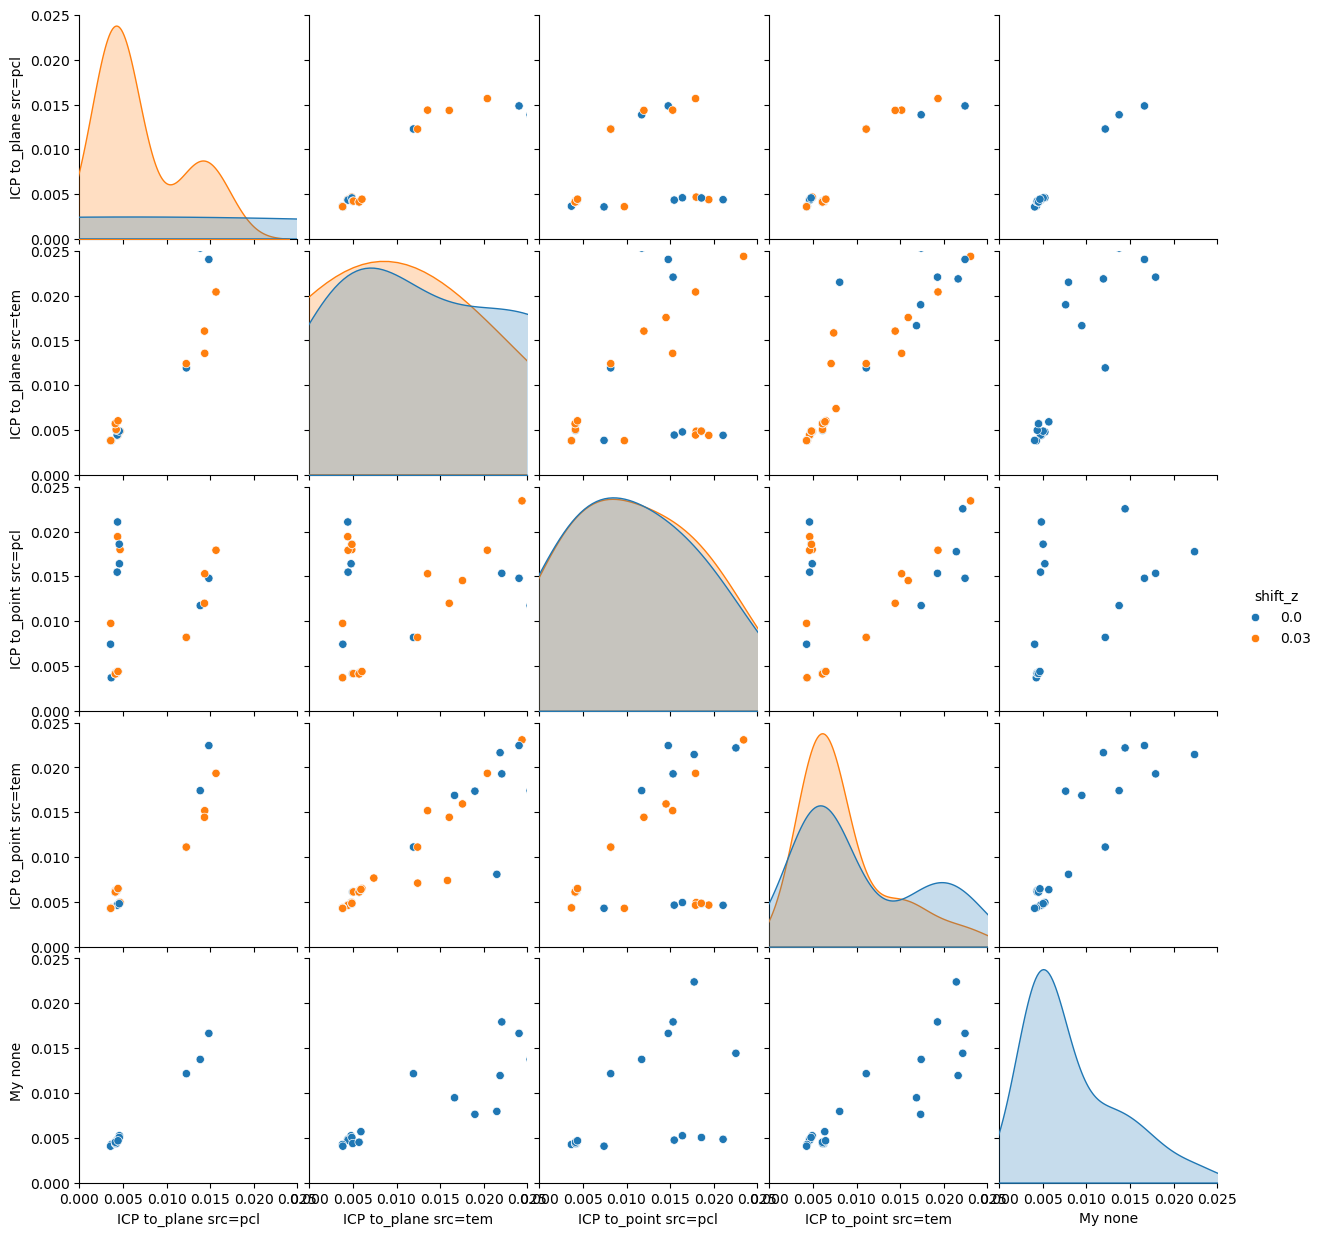

In [41]:
g = sns.pairplot(rmse, diag_kind="kde", hue="shift_z") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 0.025)
        ax.set_ylim(0, 0.025)

## Pivot Inlier Ratio

In [42]:
inlier_rat = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="inlier_ratio").reset_index() 
inlier_rat["shift_z"] = inlier_rat["shift_z"].astype(str)
inlier_rat.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.0,0.0,0.506494,0.400000,0.571429,0.824324
1,Abseits1,0.03,0.0,0.800000,0.384615,0.815789,NaN
2,Abseits14Punkte,0.0,0.0,0.000000,0.500000,0.468750,0.800000
3,Abseits14Punkte,0.03,0.0,0.638889,0.812500,0.812500,NaN
4,AbseitsAusreisser,0.0,0.0,0.417910,0.554054,0.527027,0.780822


- Bei ICP fällt auf, dass "shift_z" großen Unterschied macht
- My schneidet super ab, fast immer Top!

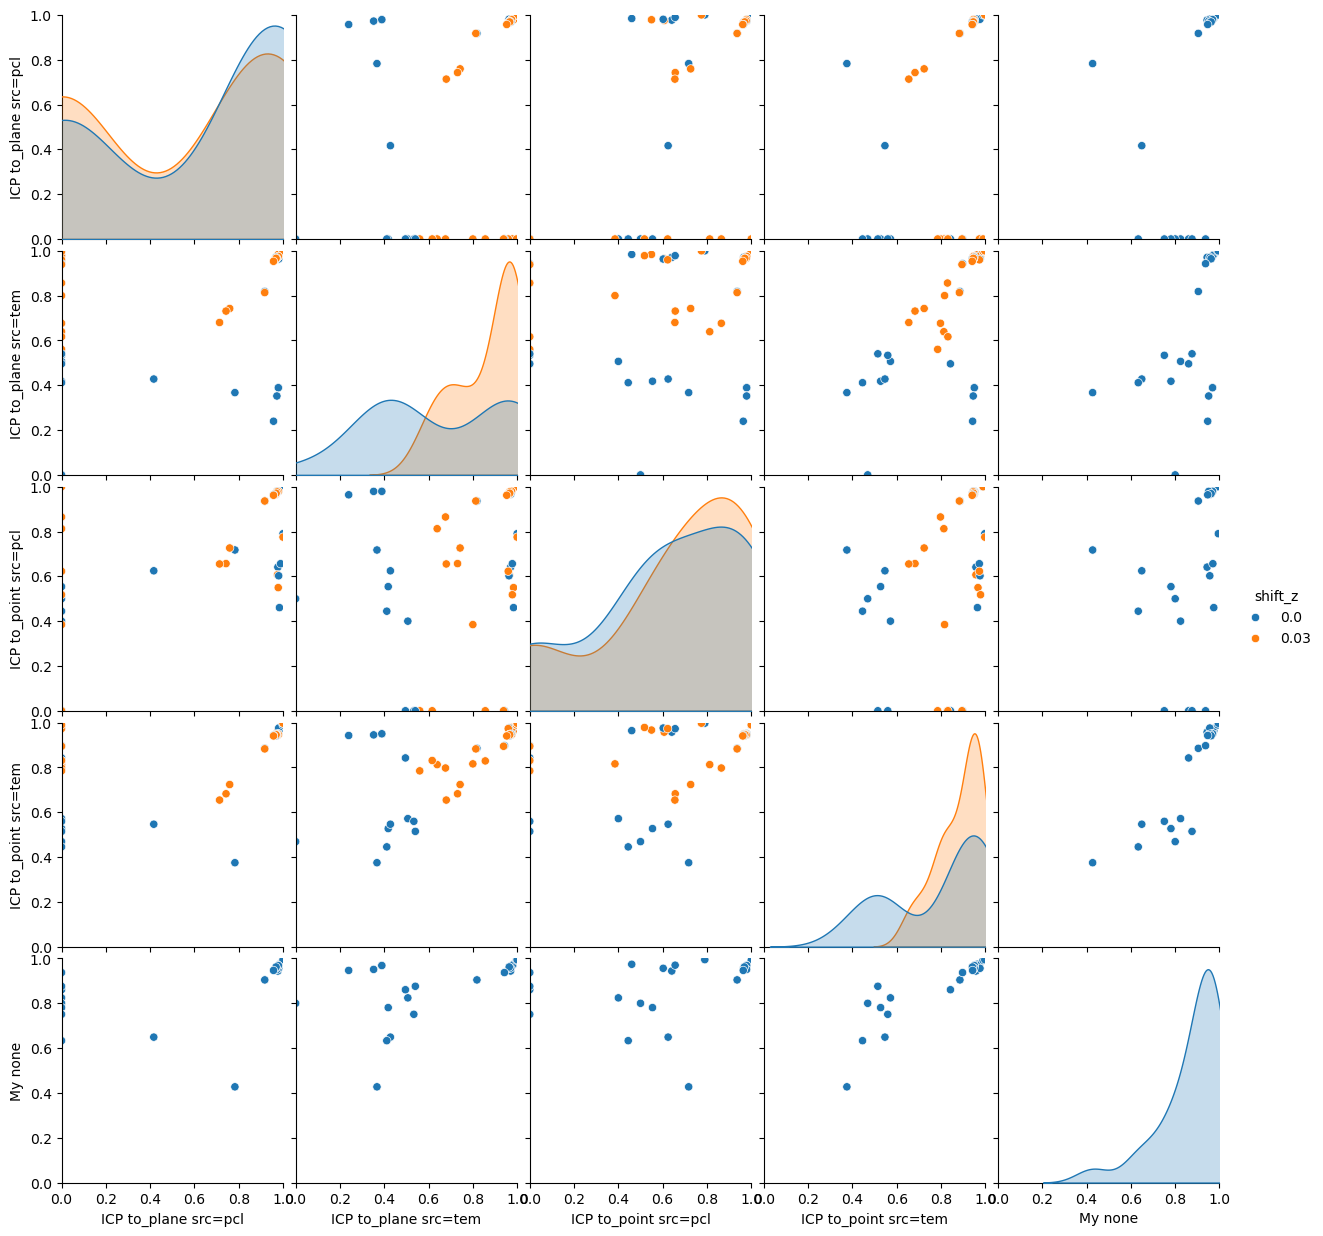

In [43]:
g = sns.pairplot(inlier_rat, diag_kind="kde", hue="shift_z") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

## Pivot Inlier RMSE
- ist nicht sehr aussagekräftig trotzdem ansehen
- alle liegen in sehr engem Bereich
- meines ist evtl. minimal schlechter (höheres max), aber fast gleich

In [72]:
mask = ((df["template"] == 0) | (df["template"].isna())) & ((df["shift_z"] == 0)) # Nur template 0 und Version "My"; ohne shift


inlier_rmse = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="rmse_inliers").reset_index()
inlier_rmse["shift_z"] = inlier_rat["shift_z"].astype(str)
inlier_rmse.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.0,NaN,0.005094,0.002440,0.006019,0.005242
1,Abseits14Punkte,0.03,0.000000,0.000000,0.006122,0.005784,0.005131
2,AbseitsAusreisser,0.0,0.000000,0.004696,0.005415,0.005459,0.005343
3,Achszaehler1,0.03,0.004653,0.006014,0.005524,0.006417,0.005774
4,Achszaehler2,0.0,0.006368,0.005697,0.005671,0.005854,0.005433


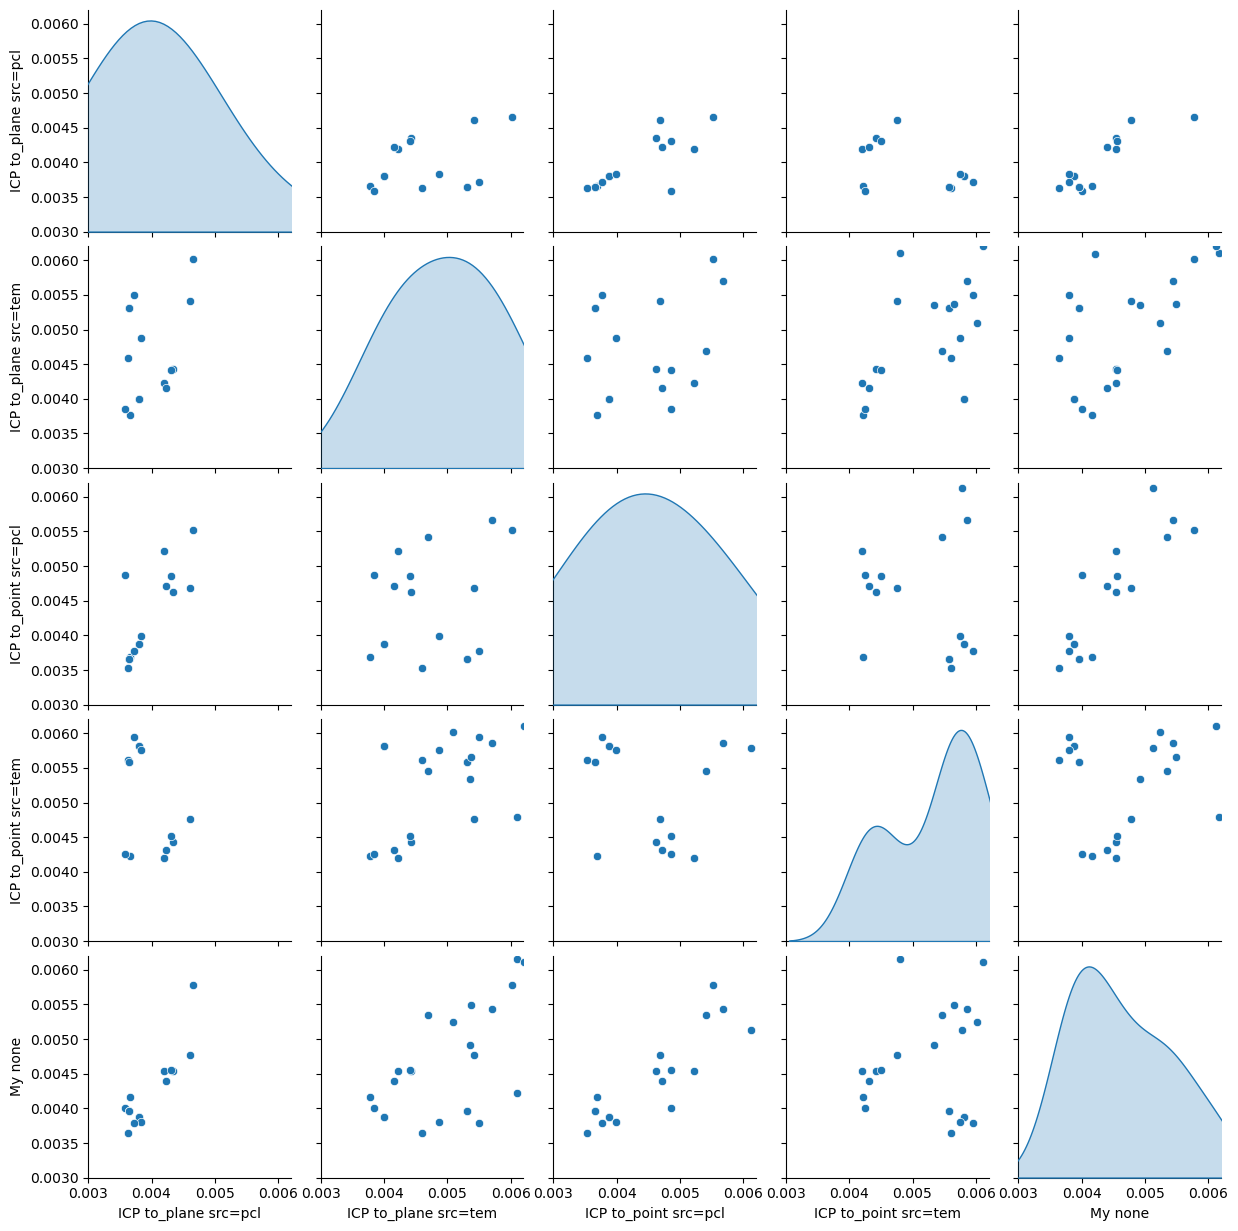

In [75]:
g = sns.pairplot(inlier_rmse, diag_kind="kde") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0.003, 0.0062)
        ax.set_ylim(0.003, 0.0062)

In [74]:
df[df["fail"] == False].groupby("how_dir").aggregate({"rmse_inliers": stats}).dropna()

rmse_inliers                                        
                           median      mean       std       min       max
how_dir                                                                  
ICP to_plane src=pcl     0.004072  0.004103  0.000427  0.003461  0.005051
ICP to_plane src=tem     0.004679  0.004690  0.000555  0.003770  0.005819
ICP to_point src=pcl     0.003908  0.004061  0.000457  0.003521  0.005464
ICP to_point src=tem     0.004901  0.004957  0.000512  0.004201  0.005972
My none                  0.004465  0.004568  0.000746  0.003648  0.006161

## Speed

- Eher kein Zusammenhang mit der Punktzahl
- ICP: besonders lang endet als fail

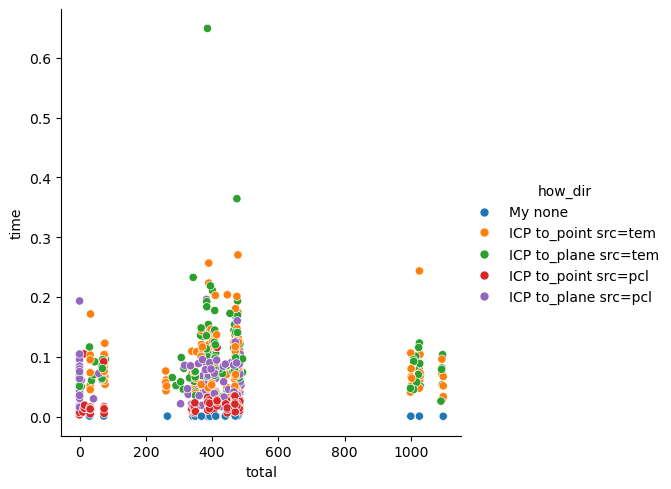

In [44]:
sns.relplot(data=df, x='total', y='time', hue='how_dir')

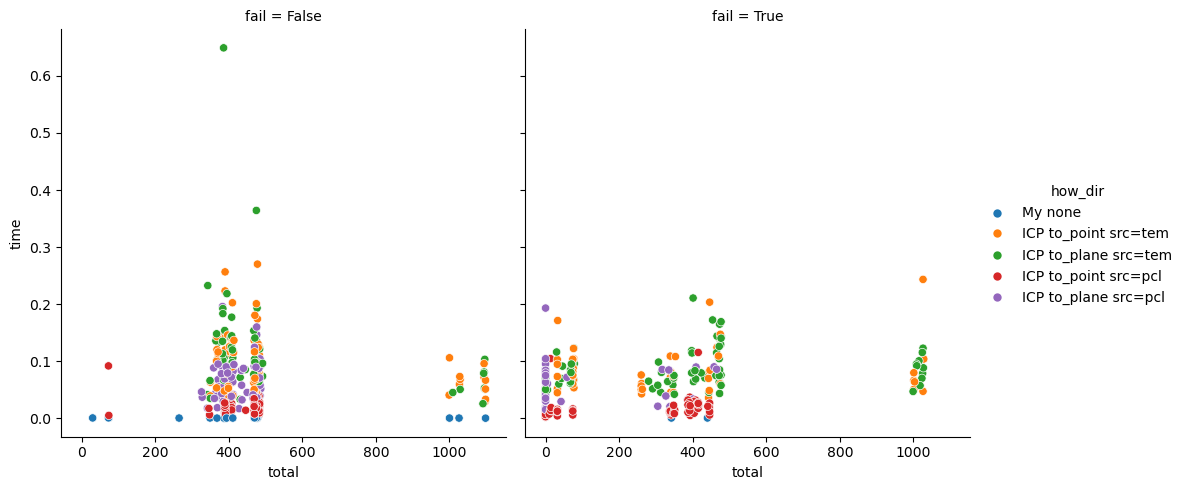

In [45]:
sns.relplot(data=df, x='total', y='time', hue='how_dir', col='fail')

- My eindeutig am besten
- ICP große Unterschiede
- to plane nicht unbedingt am besten!
    - konvergiert laut Literatur i.d.R. am schnellsten
    - man muss aber Normals berechnen, das wurde hier mitgemessen

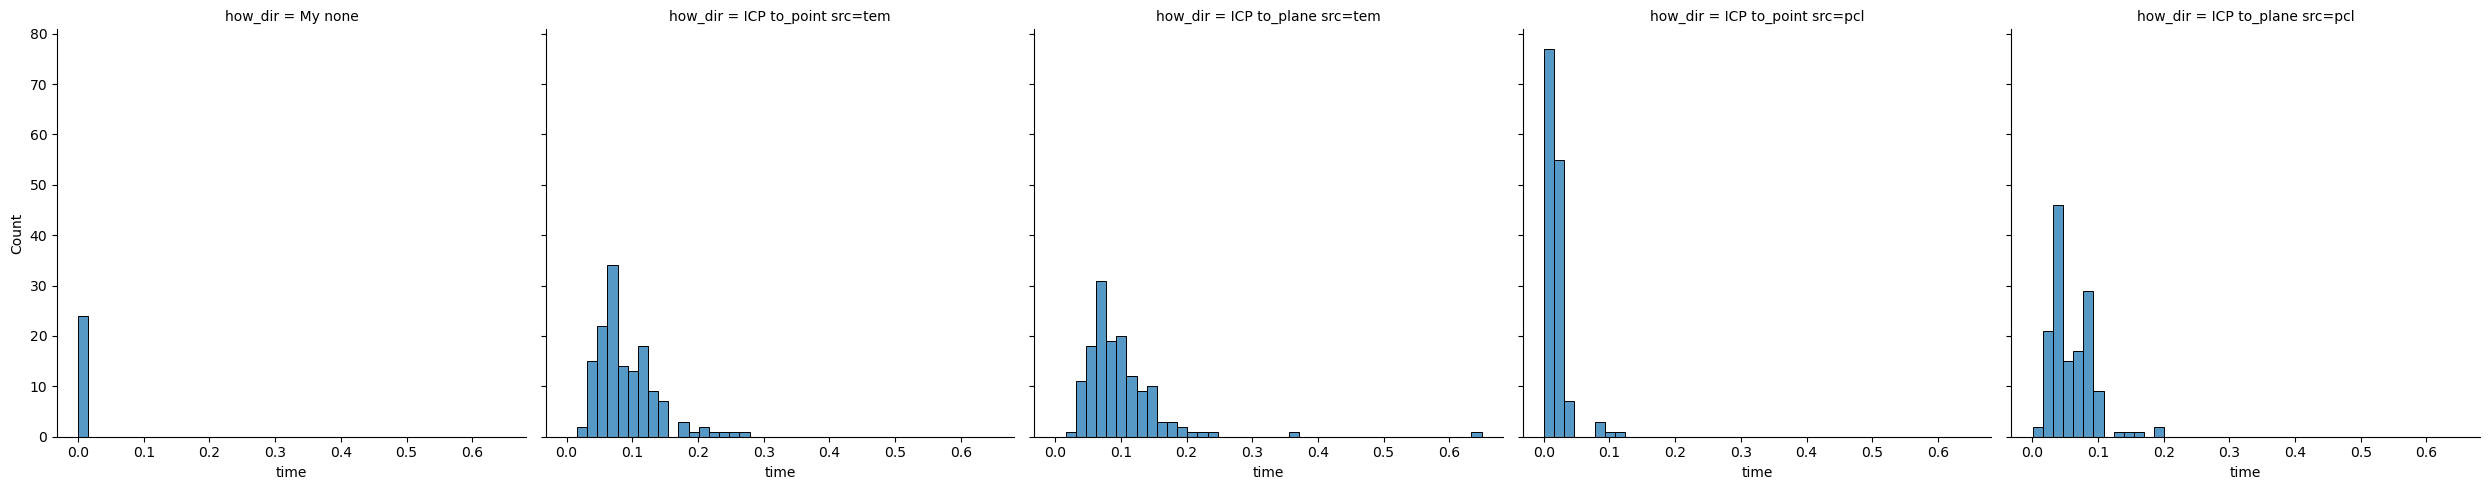

In [47]:
sns.displot(data=df, x='time', col='how_dir')

zoom

(0.0, 0.1)

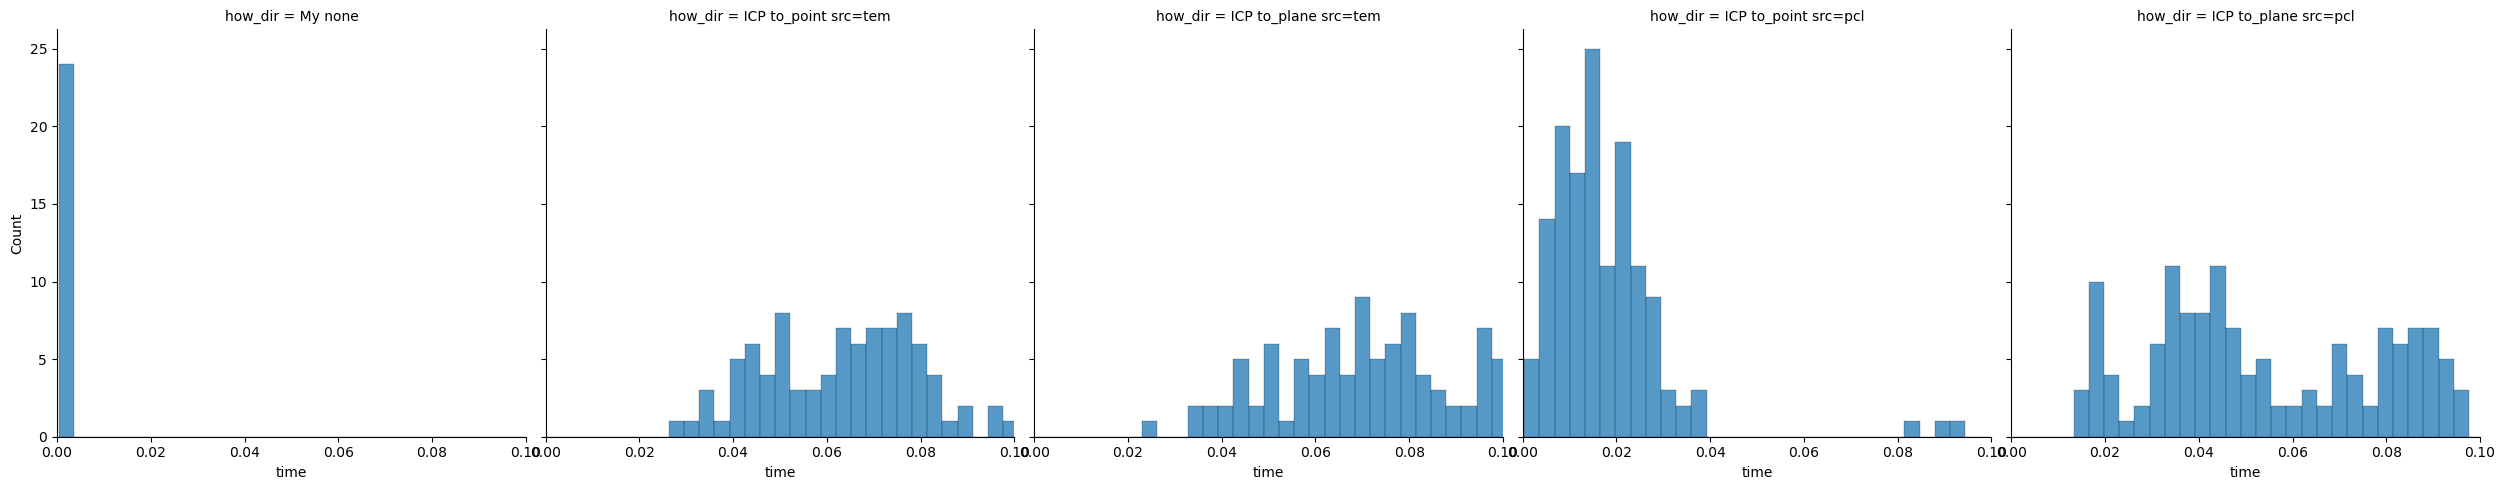

In [66]:
sns.displot(data=df, x='time', col='how_dir', bins=200)
plt.xlim(0, 0.1)

My ist 1 bis 2 Größenordnungen schneller!

In [67]:
df.groupby("how_dir").aggregate({"time": stats}).reset_index()

how_dir      time                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.051190  0.058918  0.032164  0.014730  0.195964
1  ICP to_plane src=tem  0.084340  0.099687  0.065431  0.025759  0.649102
2  ICP to_point src=pcl  0.014740  0.018905  0.017046  0.002201  0.115550
3  ICP to_point src=tem  0.076819  0.090958  0.045814  0.027748  0.270257
4               My none  0.000653  0.000706  0.000238  0.000324  0.001251

Relativ ähnliches Bild wenn man nur nicht fail anschaut

In [68]:
df[df["fail"]== False].groupby("how_dir").aggregate({"time": stats}).reset_index()

how_dir      time                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.058176  0.064360  0.032639  0.017073  0.195964
1  ICP to_plane src=tem  0.097716  0.110589  0.084340  0.025759  0.649102
2  ICP to_point src=pcl  0.019454  0.022001  0.016438  0.005202  0.091955
3  ICP to_point src=tem  0.078423  0.094299  0.049017  0.027748  0.270257
4               My none  0.000613  0.000708  0.000249  0.000324  0.001251

## Max corr
- correlation in xy oder yz Richtung (in lokalen transformierten Koordinaten) bedeutet, dass die Transformation schlecht war und die Projektion schief ist
- max corr > 0.5 ist eindeutig zu schief
- etwas darunter kann "besser geht es eben nicht" sein
- Richtig gut ist <= 0.1
- Wurde berechnet, weil "My" bei Achszählern oft schief
- Hier wird klar, dass ICP deutlich schlechter ist

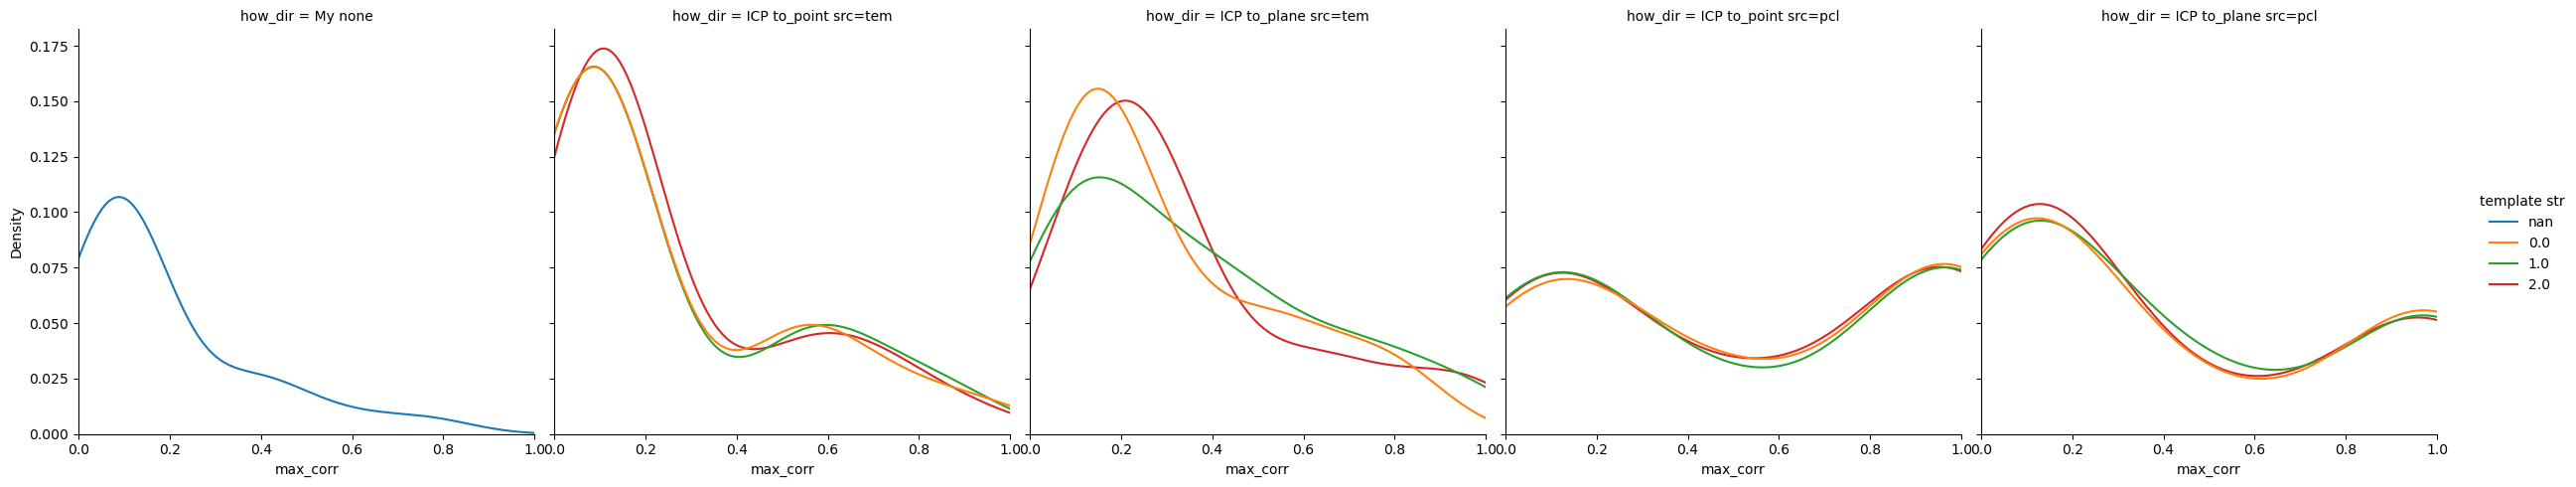

In [79]:
g = sns.displot(data=df, x="max_corr", col="how_dir", hue="template str", kind="kde")
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)
        

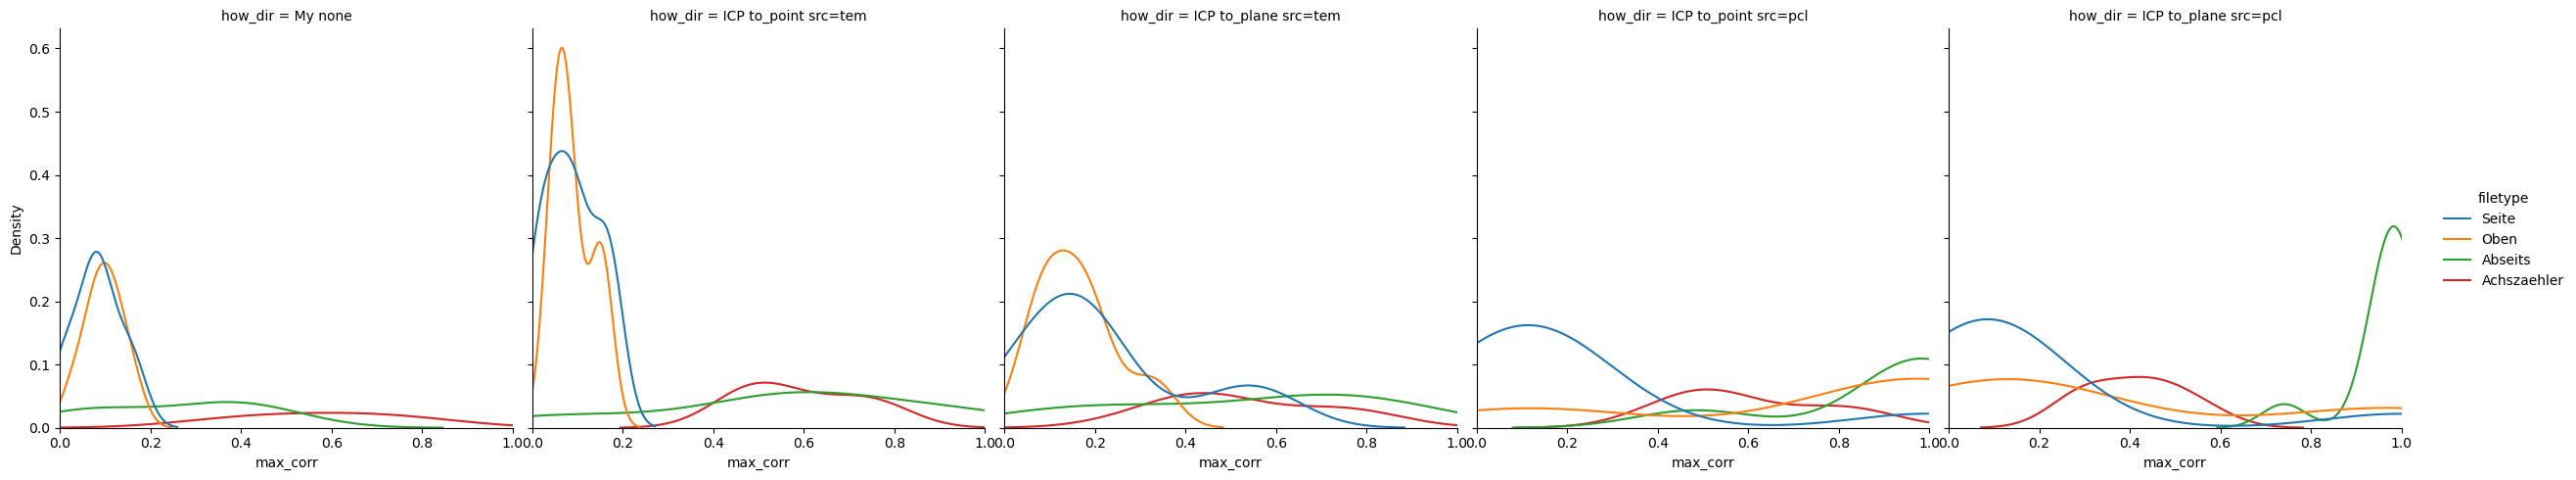

In [ ]:
mask = ((df["template"] == 0) | (df["template"].isna())) # # Nur template 0 und Version "My"
g = sns.displot(data=df[mask], x="max_corr", col="how_dir", hue="filetype", kind="kde")
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)

In [84]:
df.groupby("how_dir").aggregate({"max_corr": stats}).reset_index()

how_dir  max_corr                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.174091  0.424745  0.389901  0.034903  0.998101
1  ICP to_plane src=tem  0.244695  0.336258  0.263188  0.027813  0.997127
2  ICP to_point src=pcl  0.505454  0.544391  0.404886  0.017969  0.998101
3  ICP to_point src=tem  0.120016  0.254796  0.267821  0.008923  0.964282
4               My none  0.096761  0.185932  0.195608  0.010504  0.764932

In [85]:
df.columns

Index(['file', 'template', 'cluster_id', 'how', 'direction', 'shift_z',
       'total', 'inliers', 'inlier_ratio', 'rmse_inliers', 'rmse_all',
       'max_z_diff', 'corr_xy', 'corr_xy_upper', 'corr_yz', 'max_corr',
       'icp_rmse', 'icp_fitness', 'side_a', 'side_b', 'not_same_side', 'time',
       'how_dir', 'template str', 'filetype', 'fail'],
      dtype='object')

- Während es bei My nur die xy-Richtung betrifft, ist es bei ICP auch die zy-Richtung
- Achszähler und Abseits immer problematisch
- bei ICP z.T. aber auch einfache Situationen!

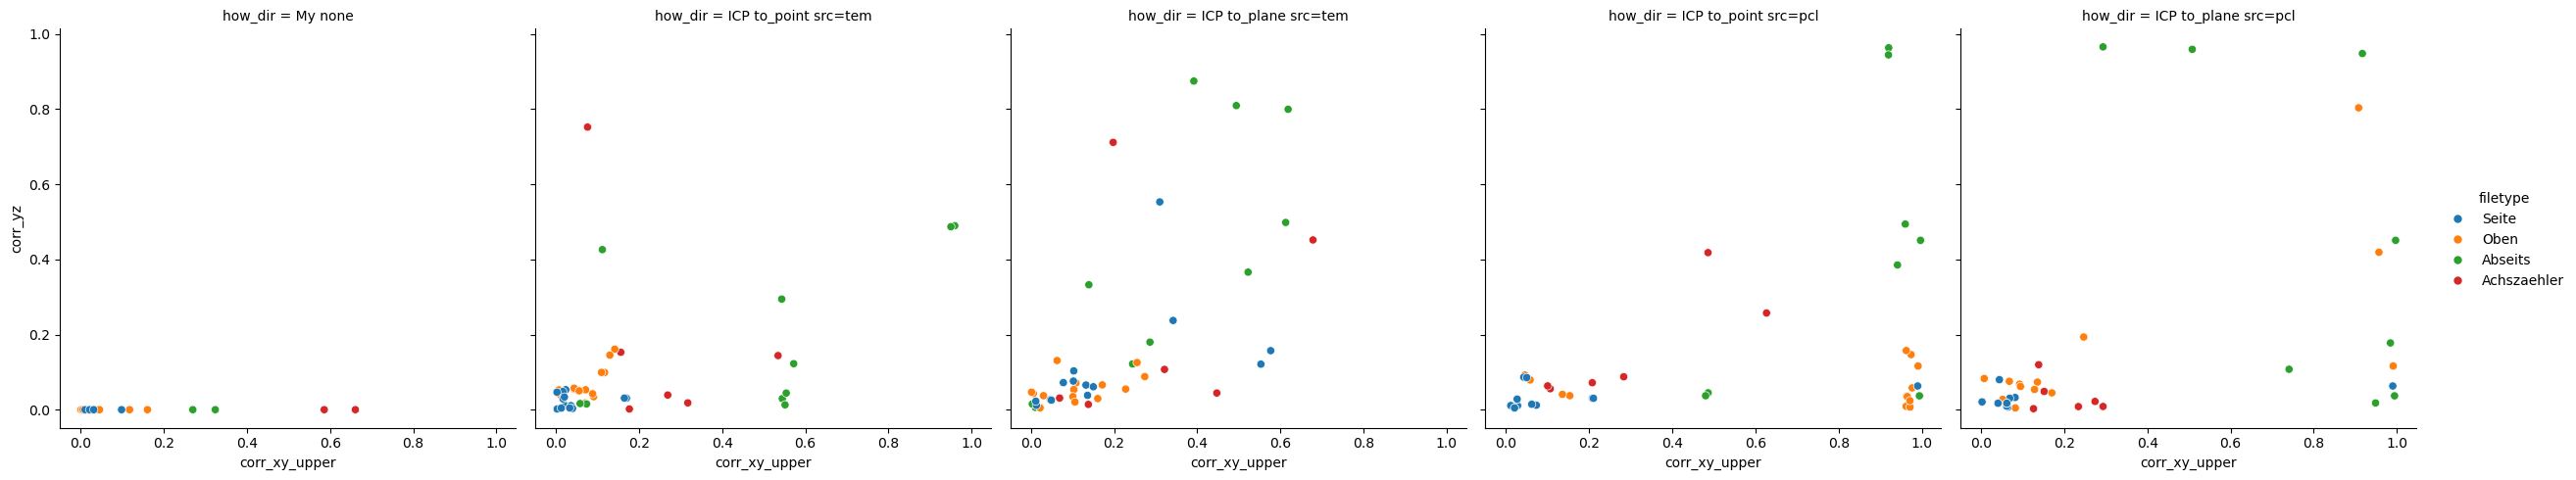

In [86]:
g = sns.relplot(data=df[mask], x="corr_xy_upper", y="corr_yz", col="how_dir", hue="filetype")